<a href="https://colab.research.google.com/github/kokchun/Machine-learning-AI22/blob/main/Lecture_code/L0-Linear_regression.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; for interacting with the code


---
# Lecture notes - Linear regression
---

This is the lecture note for **linear regression**

<p class = "alert alert-info" role="alert"><b>Note</b> that this lecture note gives a brief introduction to linear regression. I encourage you to read further about linear regression. </p>

Read more

- [ISLRv2 pp 59-82](https://www.statlearning.com/)
- [Numpy polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)
- [Seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html)
- [Data leakage](<https://en.wikipedia.org/wiki/Leakage_(machine_learning)>)

---


## Case

There is a company which spends money on advertisement for different media channels: TV, radio and newspaper.

**Task:**

- suggest marketing plan to increase sales units
- use linear regression to predict sales based on different spendings on different marketing channels

---

## Initial EDA - Exploratory Data Analysis

The dataset for this lecture comes from ISLR - Introduction to Statistical Learning. The dataset used is [Advertising.csv](https://www.kaggle.com/ishaanv/ISLR-Auto)

Units:

- TV, radio, newspaper - thousands dollars
- Sales - thousands units


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-white")

df = pd.read_csv("Data/Advertising.csv", index_col=0)
df.head()


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv("../data/Advertising.csv", index_col=0)
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [3]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


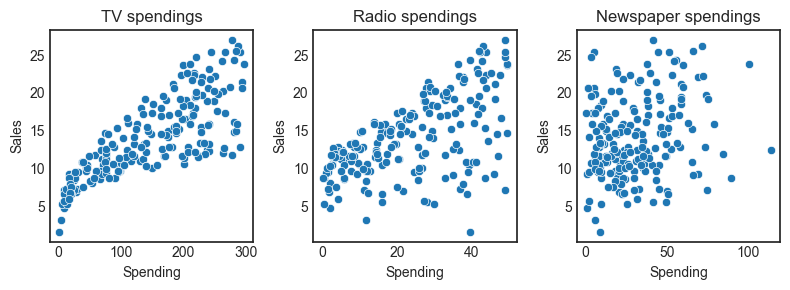

In [4]:
number_features = df.shape[1] - 1
fig, ax = plt.subplots(1, number_features, figsize=(8, 3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=feature, y="Sales", ax=ax[i])
    ax[i].set(xlabel="Spending", title=f"{feature} spendings")

fig.tight_layout()


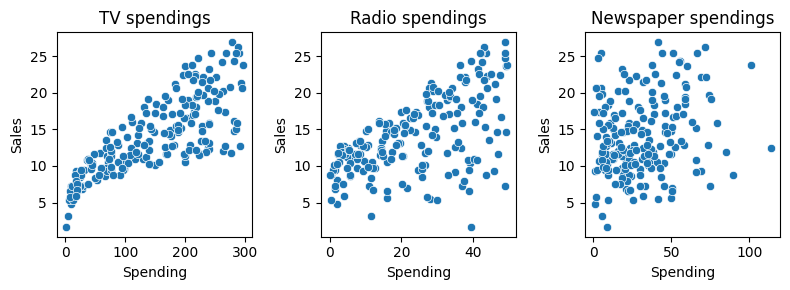

In [6]:
nof = df.shape[1]-1
fig, ax = plt.subplots(1, nof, figsize=(8,3), dpi=100)

for i, f in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x=f, y="Sales", ax=ax[i])
    ax[i].set(xlabel="Spending", title=f"{f} spendings")
fig.tight_layout()

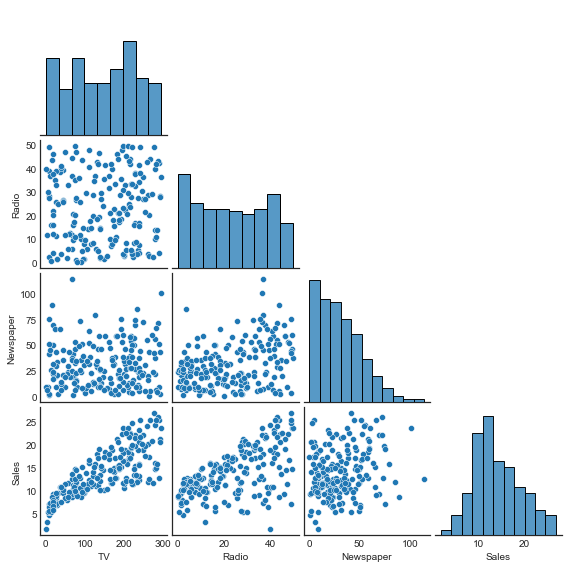

In [5]:
# plot pairwise relationships in a df
ax = sns.pairplot(df, corner=True, height=2)
# set corner to True as upper right mirrors the corner, this saves computations


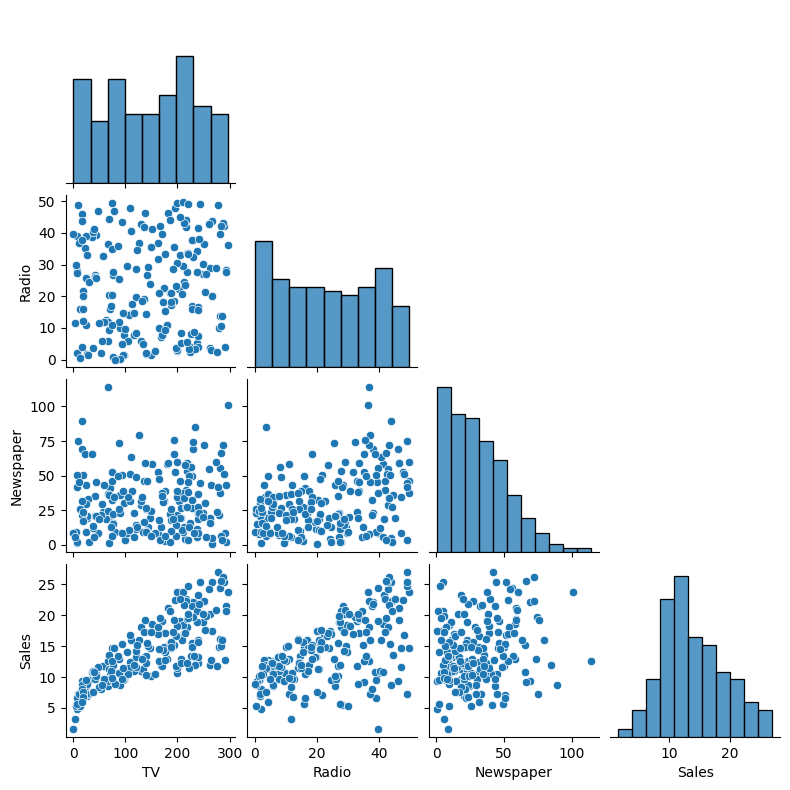

In [8]:
sns.pairplot(df, corner=True, height=2)

---

## Simple linear regression

Linear regression is a supervised learning algorithm, the predicted output is continuous. When we have one feature or predictor variable it's called simple linear regression, and with multiple features it's called multiple linear regression. Equation for simple linear regression is: 

$y \approx \beta_0 + \beta_1X$,

where $X$ is the predictor variable, $y$ is the response variable, $\beta_0$ is intercept and $\beta_1$ is slope. $\beta_0$ and $\beta_1$ are unknown parameters that needs to be estimated with the data points $(x_1, y_1), (x_2, y_2), \ldots, (x_n,y_n)$.

Example:

- $y$ - sales
- $X$ - TV spending as it looks to fit a line more than the others, through visually inspecting the scatterplots

We use the data points to get a sample estimate $\hat{\beta}_0$, $\hat{\beta}_1$, by using least squares estimate, which is the most common method. Then we get the prediction of $y$ as $\hat{y} = \hat{\beta}_0+\hat{\beta}_1x$, which is a line that is as close as possible to the data points.


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

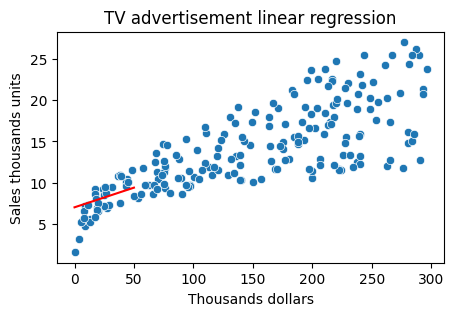

In [20]:

feature="TV"
X, y = df[feature], df["Sales"]

beta_1, beta_0 = np.polyfit(X, y, deg=1)
y_hat = lambda x: beta_0 + beta_1 * x 
spend = np.linspace(0, 50)
fig, ax = plt.figure(figsize=(5,3), dpi=100), plt.axes()

sns.scatterplot(data=df, x=feature, y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(
    title=f"{feature} advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units"
)

Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

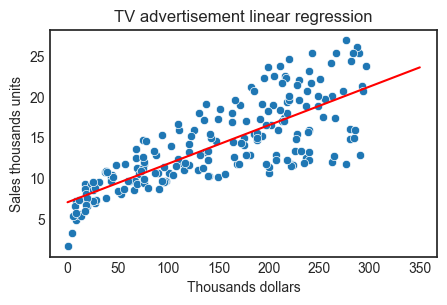

In [6]:
X, y = df["TV"], df["Sales"]
# fits a polynomial of degree deg using least squares polynomial fit
beta_1, beta_0 = np.polyfit(X, y, deg=1)  # returns coefficient with highest power first

# predicted y, note that beta_0 and beta_1 are actually beta_0, beta_1 hats as they are sample estimates


y_hat = lambda x: beta_0 + beta_1 * x

print(f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")  # spend $1000 gives 47.5 extra sold units

spend = np.linspace(0, 350)

fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(
    title="TV advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units",
)


<AxesSubplot:xlabel='TV', ylabel='Sales'>

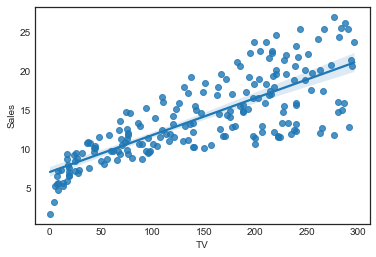

In [7]:
# regression line using seaborn regplot
sns.regplot(x=X, y=y)


<Axes: xlabel='TV', ylabel='Sales'>

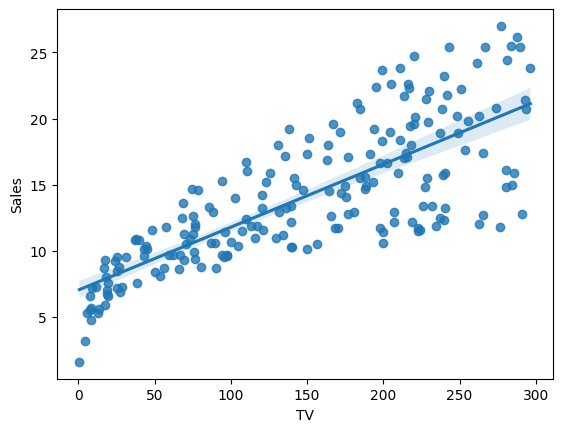

In [21]:
sns.regplot(x=X, y=y)

---

## Multiple linear regression

We used numpy polyfit to estimate $\hat\beta_0, \hat\beta_1$ from the TV-feature alone. polyfit requires 1D vector, but we want to use all the features (TV, radio, newspaper) for prediction, i.e. we want to use more explanatory variables. One way is to manually solve the **normal equation** or the **closed form equation**: $\hat{\bf{\beta}} = (\bf{X}^T\bf{X})^{-1}\bf{X}^T\bf{y}$ as we did [linear algebra course](https://github.com/kokchun/Linjar-algebra-21/blob/main/Lectures/Lec6-Matrix/Linear_regression.ipynb), but now we add more features which is simply more columns.

where $\bf{X} = 	\begin{bmatrix} 
	1 & x_1^{(1)} & x_2^{(1)}& \ldots &x_n^{(1)} \\
	1 & x_1^{(2)} & x_2^{(2)}& \ldots &x_n^{(2)}\\
	\vdots & \vdots & \vdots & \ddots & \vdots\\
	1 & x_1^{(m)}& x_2^{(m)}& \ldots &x_n^{(m)}
\end{bmatrix}, \bf{y} = \begin{bmatrix} 
y_1 \\ y_2 \\ \vdots \\ y_m
\end{bmatrix}, \hat{\bf{\beta}} = \begin{bmatrix} 
\hat\beta_0 \\\hat\beta_1\\ \vdots \\ \hat\beta_n
\end{bmatrix}$

In our example we have $n = 3$ features, $m = 200$ samples, which gives us the regression coefficients $\hat\beta_0, \hat\beta_1, \hat\beta_2, \hat\beta_3$.

The regression line is $y = \hat\beta_0 + \hat\beta_1x_1 + \hat\beta_2x_2 + \hat\beta_3x_3$. With this equation we can predict the sale for a new sample $i$ by $\hat{y}^{(i)} = \hat\beta_0 + \hat\beta_1x_1^{(i)} + \hat\beta_2x_2^{(i)} + \hat\beta_3x_3^{(i)}$ or using dot product $\hat{y}_i = \hat{\beta}\cdot\bf{x}^{(i)}$, where $\bf{x}^{(i)}$ = $[1, x_1^{(i)}, x_2^{(i)},x_3^{(i)} ]^T$


In [8]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1)

# normal equation, note that we use pinv, which stands for pseudoinverse instead of inverse, which
# uses something called SVD - Singular Value Decomposition. This gives computational complexity of O(n^2) instead of O(n^3)
regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X, y)

predict = lambda x, beta: np.dot(x, beta)

# note that we add 1 to account for the intercept
test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

# we have taken first sample from the data to see if predicted sales come close to the label 22.1, for controlling.
# note that we actually should not use a sample from the training data for testing because of data leakage
print(
    f"TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts {y_hat:.1f} thousand units"
)


TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts 20.5 thousand units


---

## Train-test split

So how well did the model perform? There are several evaluation metrics that we can use to answer this question but not on the training data. Using training data for evaluation we have **data leakage**, because at prediction time we shouldn't have this data available. Data leakage will lead to overestimation of the performance as the model has already trained on the data it is using for evaluation.

We split the data into a training set and a test set, where the test set will only be used during evaluation of the model. Practically we randomly sample this dataset without replacement with certain size for training set and the rest for testing.

In [9]:
# split 70% training and 30% test
train_fraction = int(len(df) * 0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False)
test = df.drop(
    train.index
)  # the rest of the data is the test set as we sampled without replacement


X_train, y_train = (
    train.drop("Sales", axis="columns"),
    train["Sales"],
)
X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"]

# adding intercept column with ones
X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

# checking shapes of the train|test split datasets
for dataset in ["X_train", "X_test", "y_train", "y_test"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")

Shape of X_train: (140, 4)
Shape of X_test: (60, 4)
Shape of y_train: (140,)
Shape of y_test: (60,)


---
## Prediction

Important to check dimensions in order for matrix multiplications to work properly

Predicted $\hat{\bf{y}} = \bf{X}\hat{\bf{\beta}}$

<p class = "alert alert-info" role="alert"><b>Note</b>  that we train on the training set and predict on the test set. </p>


In [10]:
# training - we fit the weights beta_hat to the training data
beta_hat = regression_fit(X_train, y_train)
print(f"Regression coefficients beta: {beta_hat.values}")

# we generalize the predict to work for matrix with many samples
predict = lambda X, weights: X @ weights

# note that X_test shape is (60, 1) and beta_hat shape needs to be (4,1)
y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.to_numpy(), (4, 1)))

print(f"Shape of y_hat is {y_hat.shape}, i.e. prediction for each sample in test set")

print(f"TV, Radio, Newspaper spending of {X_test.iloc[0].values[1:]} gives prediction of {y_hat[0][0]:.1f} thousand units")
print(f"The true sale label is y = {y_test.iloc[0]} thousand units")

Regression coefficients beta: [ 2.95609427  0.04679253  0.18706314 -0.00480492]
Shape of y_hat is (60, 1), i.e. prediction for each sample in test set
TV, Radio, Newspaper spending of [44.5 39.3 45.1] gives prediction of 12.2 thousand units
The true sale label is y = 10.4 thousand units


---
## Evaluate performance

How well did we predict $\bf{y}$ with $\hat{\bf{y}}$?

To answer this question we use several **evaluation metrics** or **loss functions**: 

- Mean Absolute Error (MAE) - mean of error between $\bf{y}$ and ${\hat{\bf{y}}}$. The unit is same as measured quantity.

$$MAE = \frac{1}{m}\sum_{i=1}^m |y_i - \hat{y}_i|$$

- Mean Squared Error (MSE) - mean of squared errors between $\bf{y}$ and ${\hat{\bf{y}}}$. It punishes large errors, and the units are in square units of the measured quantity

$$MSE = \frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2$$

- Root Mean Squared Error (RMSE) - square root of MSE between $\bf{y}$ and ${\hat{\bf{y}}}$. It punishes large errors, and the units are same as measured quantity, hence easier to interpret.

$$RMSE = \sqrt{\frac{1}{m}\sum_{i=1}^m (y_i - \hat{y}_i)^2}$$


In [39]:
m = len(y_test)
y_hat = np.reshape(y_hat, (m))  # removes the extra dimension

MAE = 1 / m * np.sum(np.abs(y_test - y_hat))
MSE = 1 / m * np.sum((y_test - y_hat) ** 2)
RMSE = np.sqrt(MSE)

for metric in [
    ("Mean absolute error", "MAE", "k units"),
    ("Mean squared error", "MSE", "M units"),  
    ("Root mean square error", "RMSE", "k units"),
]:
    print(f"{metric[0]}: {eval(metric[1]):.2f}{metric[2]}")


Mean absolute error: 1.32k units
Mean squared error: 3.54M units
Root mean square error: 1.88k units


---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---
